In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from scipy import stats
from scipy.stats import norm
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
%matplotlib inline

#warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\user\PycharmProjects\Data_analysis\residence.csv')

In [3]:
df.head()

,Residence,Region,Sub-Region,Total,Period
0,Sweden,Europe,NaN,539,2011-01
1,Singapore,Asia,Southeast Asia,14395,2011-01
2,Malaysia,Asia,Southeast Asia,16062,2011-01
3,Middle East,Asia,NaN,968,2011-01
4,India,Asia,NaN,1865,2011-01


In [4]:
col=['Residence','Region','Total','Period']
df=df.loc[:,col]

In [5]:
df.head()

,Residence,Region,Total,Period
0,Sweden,Europe,539,2011-01
1,Singapore,Asia,14395,2011-01
2,Malaysia,Asia,16062,2011-01
3,Middle East,Asia,968,2011-01
4,India,Asia,1865,2011-01


In [6]:
len(df)

3615

In [7]:
df.isnull().sum()

Residence     0
Region       93
Total         0
Period        0
dtype: int64

In [8]:
df['Residence'].unique()

array(['Sweden', 'Singapore', 'Malaysia', 'Middle East', 'India',
       'Korea,Republic of', 'Russian Federation', 'Greece', 'Indonesia',
       'Australia', 'Others, Oceania', 'S. Africa', 'Others, Africa',
       'Unstated', 'Japan', 'Mainland China', 'HongKong. Macao',
       'New Zealand', 'Philippines', 'Others, Europe',
       'Others, Southeast Asia', 'Thailand', 'Austria', 'United Kingdom',
       'Spain', 'Switzerland', 'Italy', 'Germany', 'France',
       'Netherlands', 'Others, America', 'Argentina', 'Brazil', 'Mexico',
       'United States of America', 'Canada', 'Others, Asia', 'Belgium',
       'Vietnam'], dtype=object)

### 改寫國名

In [9]:
df['Residence'][df['Residence']=='Korea,Republic of']='Korea'
df['Residence'][df['Residence']=='Mainland China']='China'
df['Residence'][df['Residence']=='United States of America']='USA'
df['Residence'][df['Residence']=='HongKong. Macao']='HongKong'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so w

In [10]:
df['Region'].unique()

array(['Europe', 'Asia', 'Oceania', 'Africa', nan, 'America'],
      dtype=object)

In [11]:
df[df['Residence']=='Unstated']

,Residence,Region,Total,Period
13,Unstated,NaN,2493,2011-01
55,Unstated,NaN,2797,2011-02
96,Unstated,NaN,3163,2011-03
134,Unstated,NaN,2775,2011-04
169,Unstated,NaN,3715,2011-05
...,...,...,...,...
3436,Unstated,NaN,72,2018-05
3477,Unstated,NaN,1163,2018-06
3535,Unstated,NaN,94,2018-07
3574,Unstated,NaN,122,2018-08


### 分離 年、月

In [14]:
df['Period']=pd.to_datetime(df['Period'])

In [15]:
df['year']=df['Period'].dt.year
df['month']=df['Period'].dt.month

In [16]:
col=['Residence','Region','Total','year']
df_1=df.loc[:,col]

df_1.head()

,Residence,Region,Total,year
0,Sweden,Europe,539,2011
1,Singapore,Asia,14395,2011
2,Malaysia,Asia,16062,2011
3,Middle East,Asia,968,2011
4,India,Asia,1865,2011


In [28]:
df_2 = df_1[df_1['year']==2011].groupby([df_1['Residence']]).sum()
df_2 = df_2.loc[df_2['Total']>100000,'Total']   
df_2

Residence
China                     1784185
HongKong                   817944
Indonesia                  156281
Japan                     1294758
Korea                      242902
Malaysia                   307898
Others, Southeast Asia     103756
Philippines                101539
Singapore                  299599
Thailand                   102902
USA                        412617
Name: Total, dtype: int64

### 2011 ~ 2018 年各國到台灣旅遊的人數折線圖 ( 每年總人數超過 100000 的國家 )

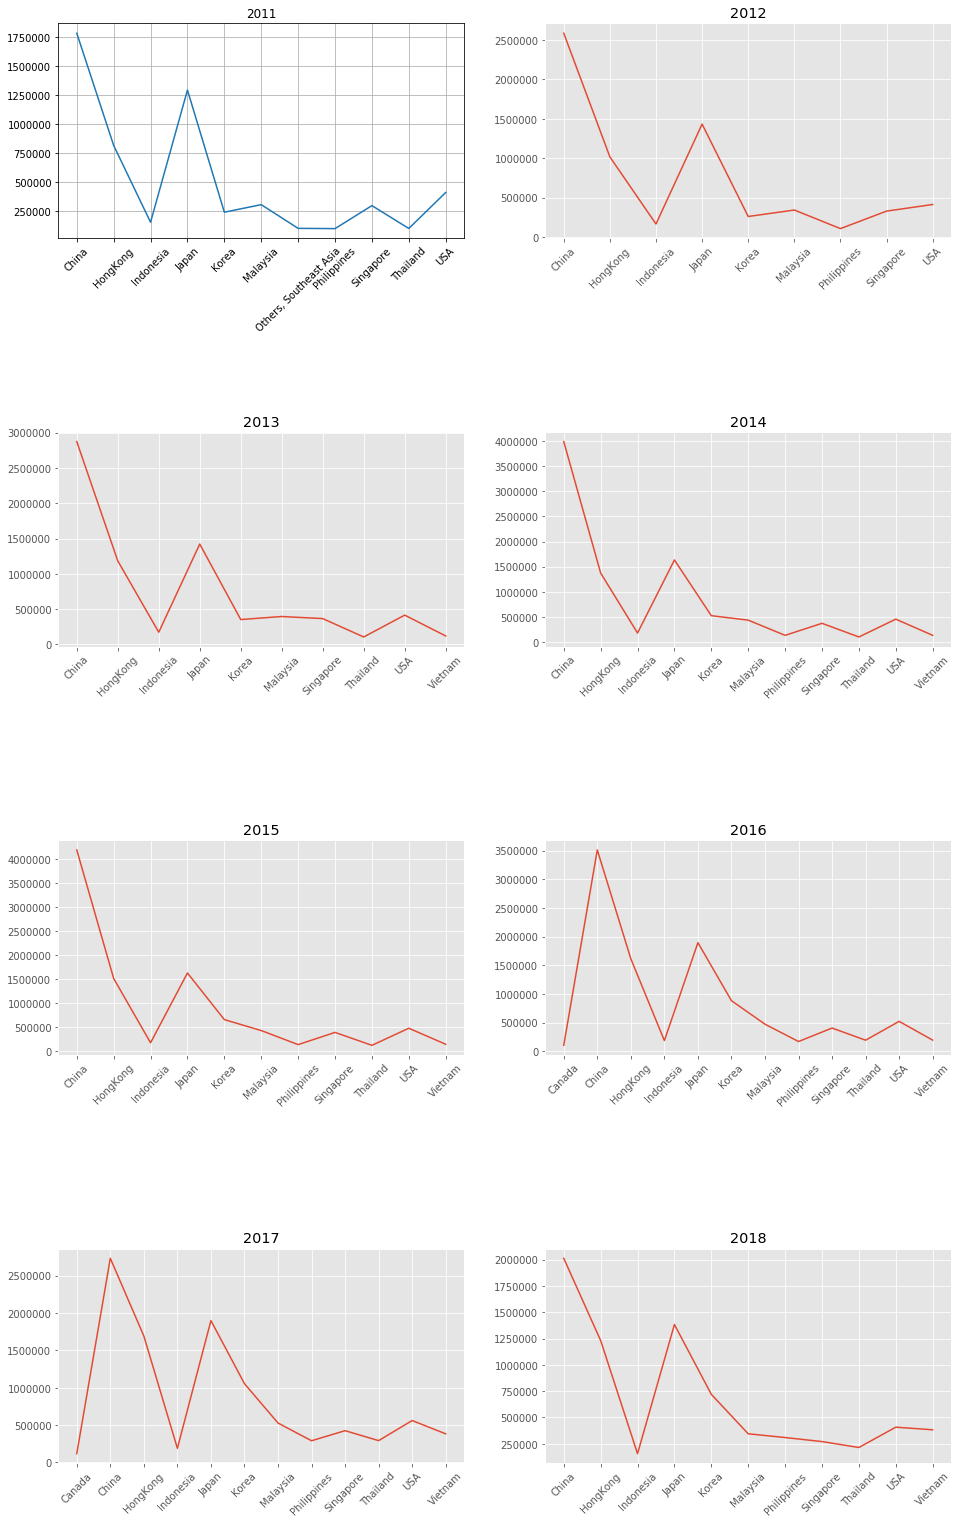

In [16]:
plt.figure(figsize=(16,25))
Y=['2011','2012','2013','2014','2015','2016','2017','2018']

for i in range(8):
    df_2 = df_1[df_1['year']==2011+i].groupby([df_1['Residence']]).sum()
    df_2 = df_2.loc[df_2['Total']>100000,'Total']           # 每年總人數超過 100000 的國家
    plt.subplots_adjust(left=0.125, 
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.9)
    plt.subplot(421+i)
    plt.title(Y[i])
    plt.grid(True)
    plt.style.use('ggplot')
    plt.plot(df_2)
    plt.xticks(rotation=45)

#### 前三名 : 1. 中國  2. 日本 3. 香港

### 長條圖

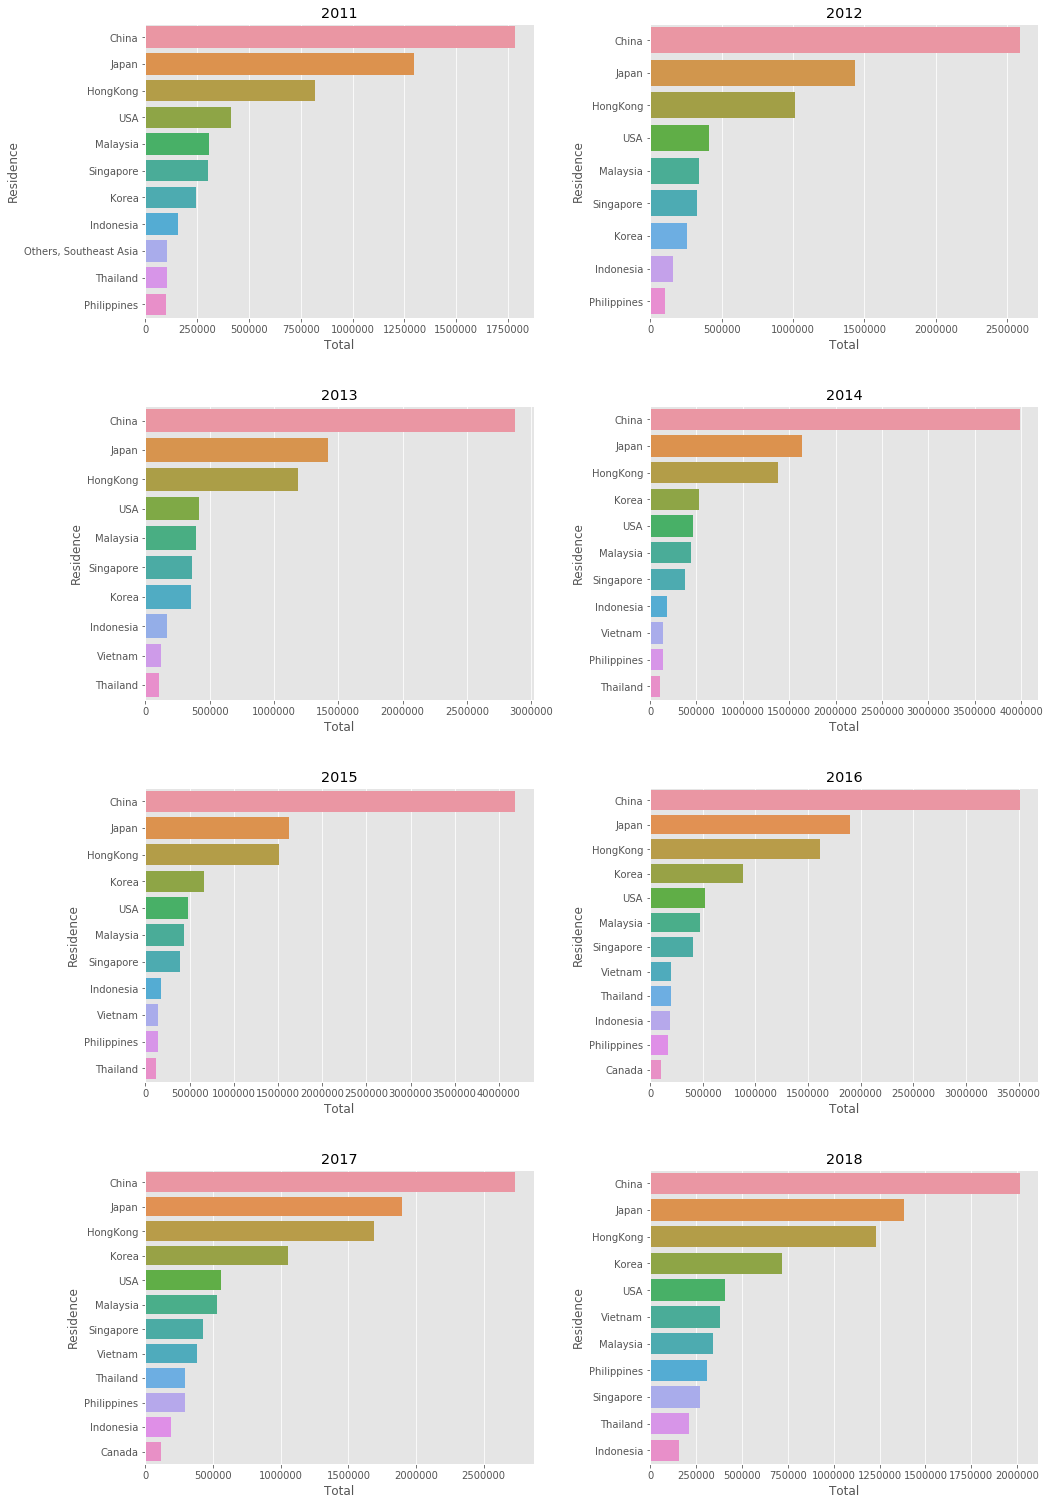

In [41]:
plt.figure(figsize=(16,25))
Y=['2011','2012','2013','2014','2015','2016','2017','2018']

for i in range(8):
    df_2 = df_1[df_1['year']==2011+i].groupby([df_1['Residence']]).sum()
    df_2 = df_2.loc[df_2['Total']>100000,'Total']           # 每年總人數超過 100000 的國家
    df_2 = df_2.to_frame()
    df_2 = df_2.reset_index()
    df_2 = df_2.sort_values(by = "Total",ascending=False)

    plt.subplots_adjust(left=0.125, 
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
    plt.subplot(421+i)
    plt.title(Y[i])
    sns.barplot(y="Residence", x="Total", data=df_2)

### 觀察 :

1. 韓國從 2013 年底開始，躍居第四，超越美國，並且逐年遞增

   原因:
   
   1. 航線變多
   
   2. 機票便宜
   
   3. 2019 日韓貿易戰，往日本的旅客減少


2. 中國從 2016 年起，總人數逐年下降

   原因: 蔡英文總統當選，綠黨執政

### 這筆資料只記錄到 2018 年的 9 月 !

### 中國各年總人數比較

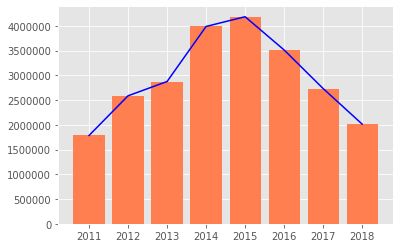

In [18]:
col=['Residence','Region','Total','year']
df_year=df.loc[:,col]

df_Y = df_year[df_year['Residence']=='China'].groupby(df_year['year']).sum()

df_Y = df_Y.iloc[:,0]

plt.grid(True)
plt.bar(df_Y.index,df_Y.values,color='coral')
plt.plot(df_Y,color='b')

###  日本各年總人數比較

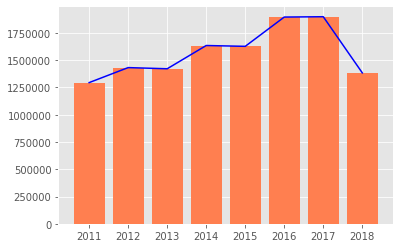

In [19]:
col=['Residence','Region','Total','year']
df_year=df.loc[:,col]

df_Y = df_year[df_year['Residence']=='Japan'].groupby(df_year['year']).sum()

df_Y = df_Y.iloc[:,0]

plt.grid(True)
plt.bar(df_Y.index,df_Y.values,color='coral')
plt.plot(df_Y,color='b')

###  香港各年總人數比較

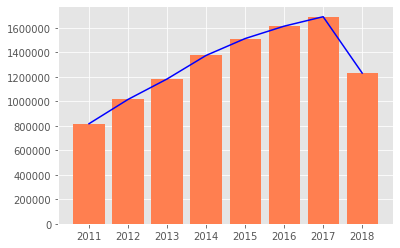

In [20]:
col=['Residence','Region','Total','year']
df_year=df.loc[:,col]

df_Y = df_year[df_year['Residence']=='HongKong'].groupby(df_year['year']).sum()

df_Y = df_Y.iloc[:,0]

plt.grid(True)
plt.bar(df_Y.index,df_Y.values,color='coral')
plt.plot(df_Y,color='b')

###  韓國各年總人數比較

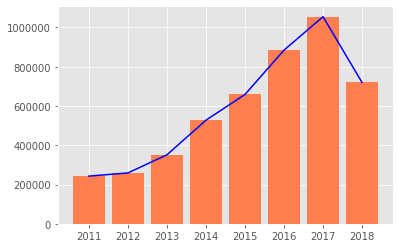

In [21]:
col=['Residence','Region','Total','year']
df_year=df.loc[:,col]

df_Y = df_year[df_year['Residence']=='Korea'].groupby(df_year['year']).sum()

df_Y = df_Y.iloc[:,0]

plt.grid(True)
plt.bar(df_Y.index,df_Y.values,color='coral')
plt.plot(df_Y,color='b')

###  美國各年總人數比較

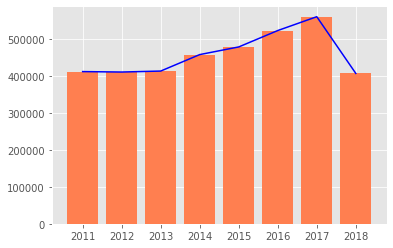

In [22]:
col=['Residence','Region','Total','year']
df_year=df.loc[:,col]

df_Y = df_year[df_year['Residence']=='USA'].groupby(df_year['year']).sum()

df_Y = df_Y.iloc[:,0]

plt.grid(True)
plt.bar(df_Y.index,df_Y.values,color='coral')
plt.plot(df_Y,color='b')

### 年增長量 : （今年 - 前年）/ 10000 (萬)，從 2012 年起至 2016 年

#### 中國

#### 2016 年呈現負增長

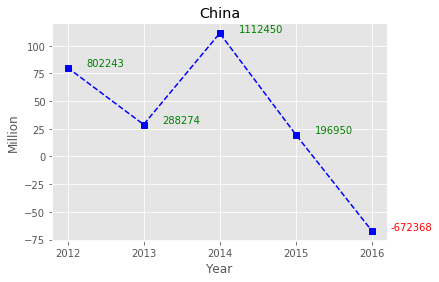

In [23]:
col=['Residence','Region','Total','year']
df_year=df.loc[:,col]

df_Y = df_year[df_year['Residence']=='China'].groupby(df_year['year']).sum()

df_Y = df_Y.iloc[:,0]


Y = []
Growth = []

for i in range(1,6):
    Y.append(df_Y.index[i])
    Growth.append((df_Y.values[i]-df_Y.values[i-1])/10000)
    if (df_Y.values[i]-df_Y.values[i-1])<0:
        plt.text(df_Y.index[i]+0.25,(df_Y.values[i]-df_Y.values[i-1])/10000+1,df_Y.values[i]-df_Y.values[i-1],color='r')
    else:
        plt.text(df_Y.index[i]+0.25,(df_Y.values[i]-df_Y.values[i-1])/10000+1,df_Y.values[i]-df_Y.values[i-1],color='g')
        
        
df_G = pd.Series(Growth,index=Y)
plt.plot(df_G,'b--s')
plt.xticks(Y) 
plt.title("China")
plt.ylabel('Million')
plt.xlabel('Year')
plt.show()

#### 日本

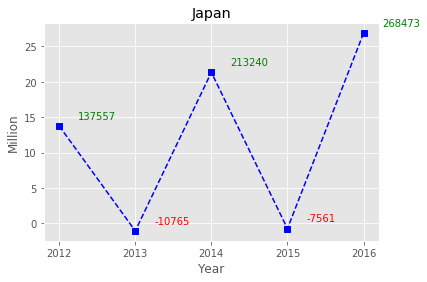

In [24]:
col=['Residence','Region','Total','year']
df_year=df.loc[:,col]

df_Y = df_year[df_year['Residence']=='Japan'].groupby(df_year['year']).sum()

df_Y = df_Y.iloc[:,0]


Y = []
Growth = []

for i in range(1,6):
    Y.append(df_Y.index[i])
    Growth.append((df_Y.values[i]-df_Y.values[i-1])/10000)
    if (df_Y.values[i]-df_Y.values[i-1])<0:
        plt.text(df_Y.index[i]+0.25,(df_Y.values[i]-df_Y.values[i-1])/10000+1,df_Y.values[i]-df_Y.values[i-1],color='r')
    else:
        plt.text(df_Y.index[i]+0.25,(df_Y.values[i]-df_Y.values[i-1])/10000+1,df_Y.values[i]-df_Y.values[i-1],color='g')
    
df_G = pd.Series(Growth,index=Y)
plt.plot(df_G,'b--s')
plt.xticks(Y) 
plt.title("Japan")
plt.ylabel('Million')
plt.xlabel('Year')
plt.show()

#### 香港

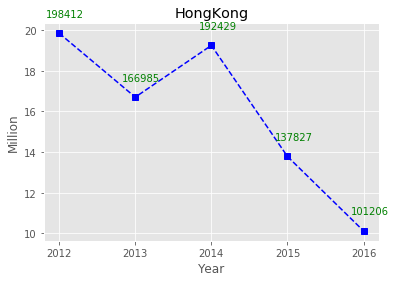

In [25]:
col=['Residence','Region','Total','year']
df_year=df.loc[:,col]

df_Y = df_year[df_year['Residence']=='HongKong'].groupby(df_year['year']).sum()

df_Y = df_Y.iloc[:,0]


Y = []
Growth = []

for i in range(1,6):
    Y.append(df_Y.index[i])
    Growth.append((df_Y.values[i]-df_Y.values[i-1])/10000)
    if (df_Y.values[i]-df_Y.values[i-1])<0:
        plt.text(df_Y.index[i]-0.17,(df_Y.values[i]-df_Y.values[i-1])/10000+0.8,df_Y.values[i]-df_Y.values[i-1],color='r')
    else:
        plt.text(df_Y.index[i]-.17,(df_Y.values[i]-df_Y.values[i-1])/10000+0.8,df_Y.values[i]-df_Y.values[i-1],color='g')
    
df_G = pd.Series(Growth,index=Y)
plt.plot(df_G,'b--s')
plt.xticks(Y)  
plt.title("HongKong")
plt.ylabel('Million')
plt.xlabel('Year')
plt.show()

#### 韓國

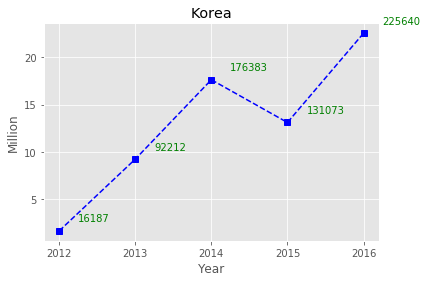

In [26]:
col=['Residence','Region','Total','year']
df_year=df.loc[:,col]

df_Y = df_year[df_year['Residence']=='Korea'].groupby(df_year['year']).sum()

df_Y = df_Y.iloc[:,0]


Y = []
Growth = []

for i in range(1,6):
    Y.append(df_Y.index[i])
    Growth.append((df_Y.values[i]-df_Y.values[i-1])/10000)
    if (df_Y.values[i]-df_Y.values[i-1])<0:
        plt.text(df_Y.index[i]+0.25,(df_Y.values[i]-df_Y.values[i-1])/10000+1,df_Y.values[i]-df_Y.values[i-1],color='r')
    else:
        plt.text(df_Y.index[i]+0.25,(df_Y.values[i]-df_Y.values[i-1])/10000+1,df_Y.values[i]-df_Y.values[i-1],color='g')
    
df_G = pd.Series(Growth,index=Y)
plt.plot(df_G,'b--s')
plt.xticks(Y) 
plt.title("Korea")
plt.ylabel('Million')
plt.xlabel('Year')
plt.show()

#### 美國

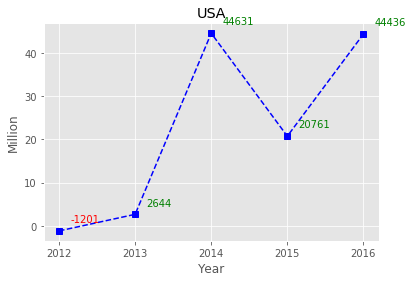

In [27]:
col=['Residence','Region','Total','year']
df_year=df.loc[:,col]

df_Y = df_year[df_year['Residence']=='USA'].groupby(df_year['year']).sum()

df_Y = df_Y.iloc[:,0]


Y = []
Growth = []

for i in range(1,6):
    Y.append(df_Y.index[i])
    Growth.append((df_Y.values[i]-df_Y.values[i-1])/1000)
    if (df_Y.values[i]-df_Y.values[i-1])<0:
        plt.text(df_Y.index[i]+0.15,(df_Y.values[i]-df_Y.values[i-1])/1000+2,df_Y.values[i]-df_Y.values[i-1],color='r')
    else:
        plt.text(df_Y.index[i]+0.15,(df_Y.values[i]-df_Y.values[i-1])/1000+2,df_Y.values[i]-df_Y.values[i-1],color='g')
    
df_G = pd.Series(Growth,index=Y)
plt.plot(df_G,'b--s')
plt.xticks(Y) 
plt.title("USA")
plt.ylabel('Million')
plt.xlabel('Year')
plt.show()

#### 中國 和 其他國家( 不含中國 ) 總和的年增長率比較

#### 排除中國大陸，其餘總和的年增長率是上升的

In [28]:
# 中國資料

col=['Residence','Region','Total','year']
df_year=df.loc[:,col]

df_Y_1 = df_year[df_year['Residence']=='China'].groupby(df_year['year']).sum()

df_Y_1 = df_Y_1.iloc[:,0] 


Y = []
Growth_China = []

for i in range(1,6):
    Y.append(df_Y_1.index[i])
    Growth_China.append((df_Y_1.values[i]-df_Y_1.values[i-1])/10000)
    
df_China = pd.Series(Growth_China,index=Y)

In [29]:
# 其餘各國總和

col=['Residence','Region','Total','year']
df_year=df.loc[:,col]

df_Y_2 = df_year[df_year['Residence']!='China'].groupby(df_year['year']).sum()

df_Y_2 = df_Y_2.iloc[:,0]

Y = []
Growth_Other = []

for i in range(1,6):
    Y.append(df_Y_2.index[i])
    Growth_Other.append((df_Y_2.values[i]-df_Y_2.values[i-1])/10000)
    
df_Other = pd.Series(Growth_Other,index=Y)

Text(0.5, 0, 'Year')

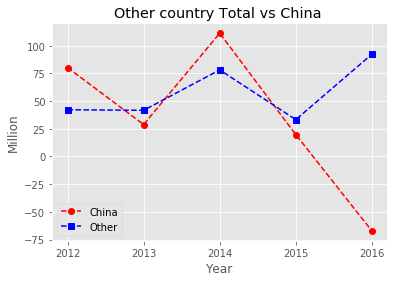

In [30]:
plt.plot(df_China,'r--o')
plt.plot(df_Other,'b--s')

plt.legend(['China','Other'],loc=3)        # 圖例顯示
plt.xticks(Y) 
plt.title("Other country Total vs China ")
plt.ylabel('Million')
plt.xlabel('Year')

#### 中國 2014 年經濟起飛

#### 中國 2015 年後開始下降 ( 跟共產黨禁令有關 )

#### 日本有維持的趨勢，但增長率起起伏伏

#### 香港、韓國、美國人數仍有上升趨勢

#### 香港增長率逐年下降

### 中國旅客的統計歷年來各月的比較

In [31]:
col=['Residence','Region','Total','month']
df_month=df.loc[:,col]
  
df_month.head()

,Residence,Region,Total,month
0,Sweden,Europe,539,1
1,Singapore,Asia,14395,1
2,Malaysia,Asia,16062,1
3,Middle East,Asia,968,1
4,India,Asia,1865,1


In [32]:
df_M = df_month[df_month['Residence']=='China'].groupby(df_month['month']).sum()

df_M = df_M.iloc[:,0]

df_M

month
1     1868239
2     2104289
3     2074764
4     2323738
5     2023657
6     1812666
7     2078664
8     2019931
9     1923836
10    1822823
11    1829356
12    1792559
Name: Total, dtype: int64

<BarContainer object of 12 artists>

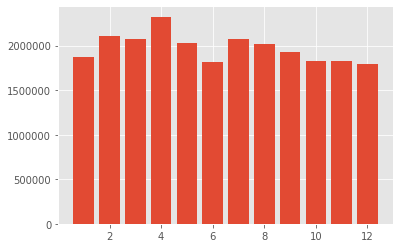

In [33]:
plt.grid(True)
plt.bar(df_M.index,df_M.values)

#### 中國大陸有一個禮拜的 51 勞動節假期 ( 黃金長假 )，故四月佔據高峰

### 逐年查看各月的變化

In [34]:
col=['Residence','Region','Total','month','year']
df_month_new=df.loc[:,col]

df_month_new.head()

,Residence,Region,Total,month,year
0,Sweden,Europe,539,1,2011
1,Singapore,Asia,14395,1,2011
2,Malaysia,Asia,16062,1,2011
3,Middle East,Asia,968,1,2011
4,India,Asia,1865,1,2011


In [35]:
df_M = df_month_new[df_month_new['year']==2011+5]

df_M[df_M['Residence']=='China'].groupby(df_month_new['month']).sum()

,Total,month,year
month,,,
1,366409,1,2016
2,405307,2,2016
3,363878,3,2016
4,375567,4,2016
5,327254,5,2016
6,271478,6,2016
7,299805,7,2016
8,248538,8,2016
9,214764,9,2016


### 中國每年旅遊情況

#### 2018 年 中美貿易戰開打

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


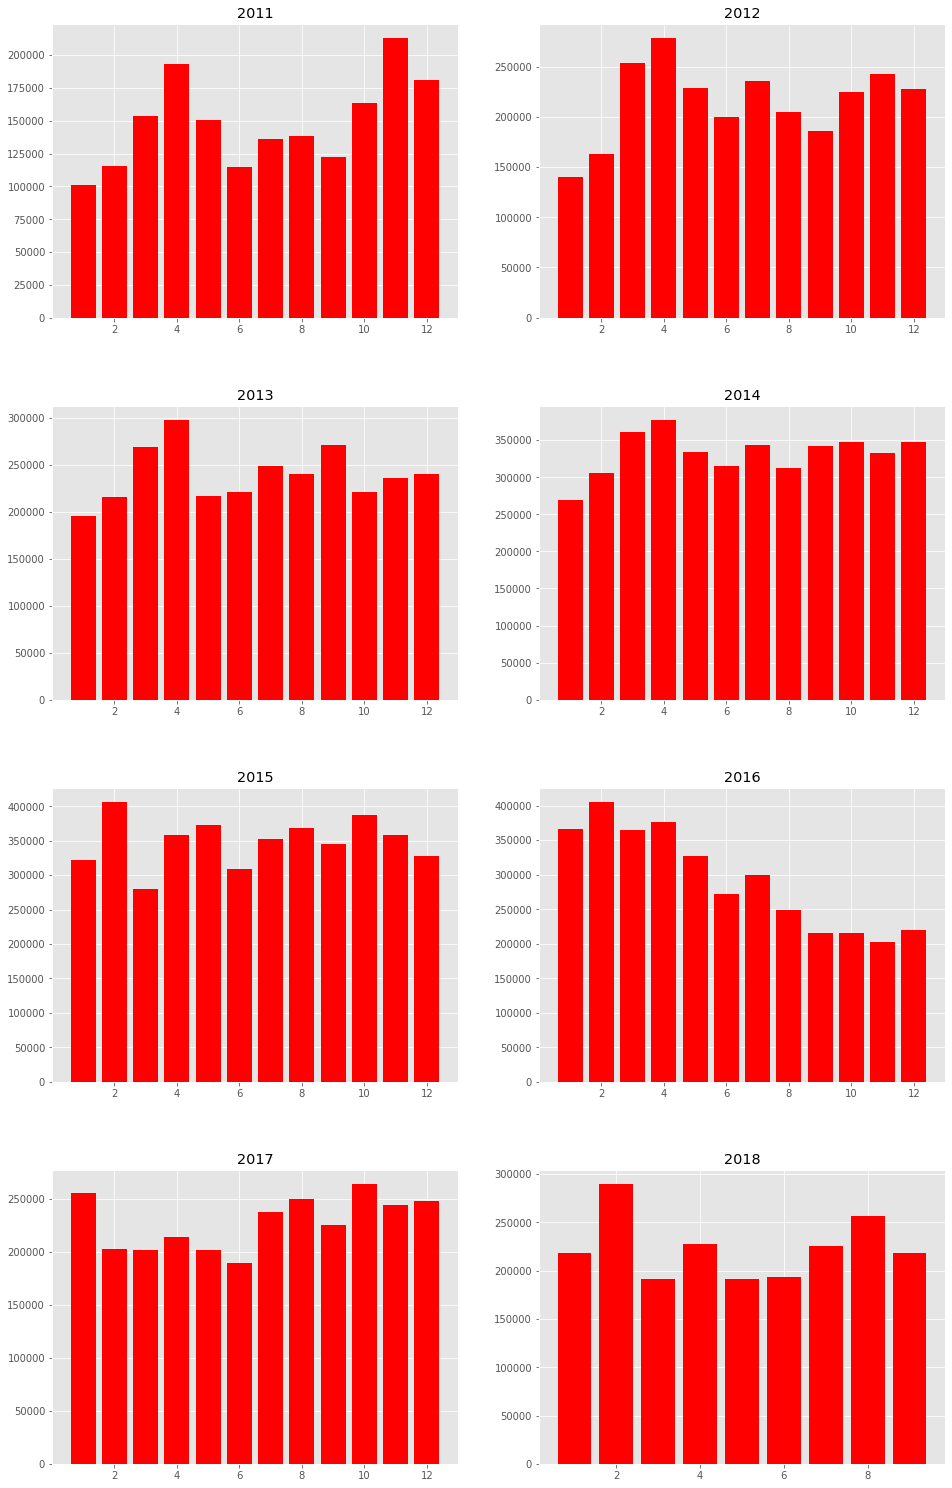

In [36]:
plt.figure(figsize=(16,25))
Y=['2011','2012','2013','2014','2015','2016','2017','2018']

for i in range(8):
    df_M = df_month_new[df_month_new['year']==2011+i]
    df_M = df_M[df_month_new['Residence']=='China'].groupby(df_month_new['month']).sum()
    df_M = df_M.iloc[:,0]
    plt.grid(True)
    plt.subplots_adjust(left=0.125, 
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.3)
    plt.subplot(421+i)
    plt.title(Y[i])
    plt.bar(df_M.index,df_M.values,color='rr')
    

### 日本每年旅遊情況

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


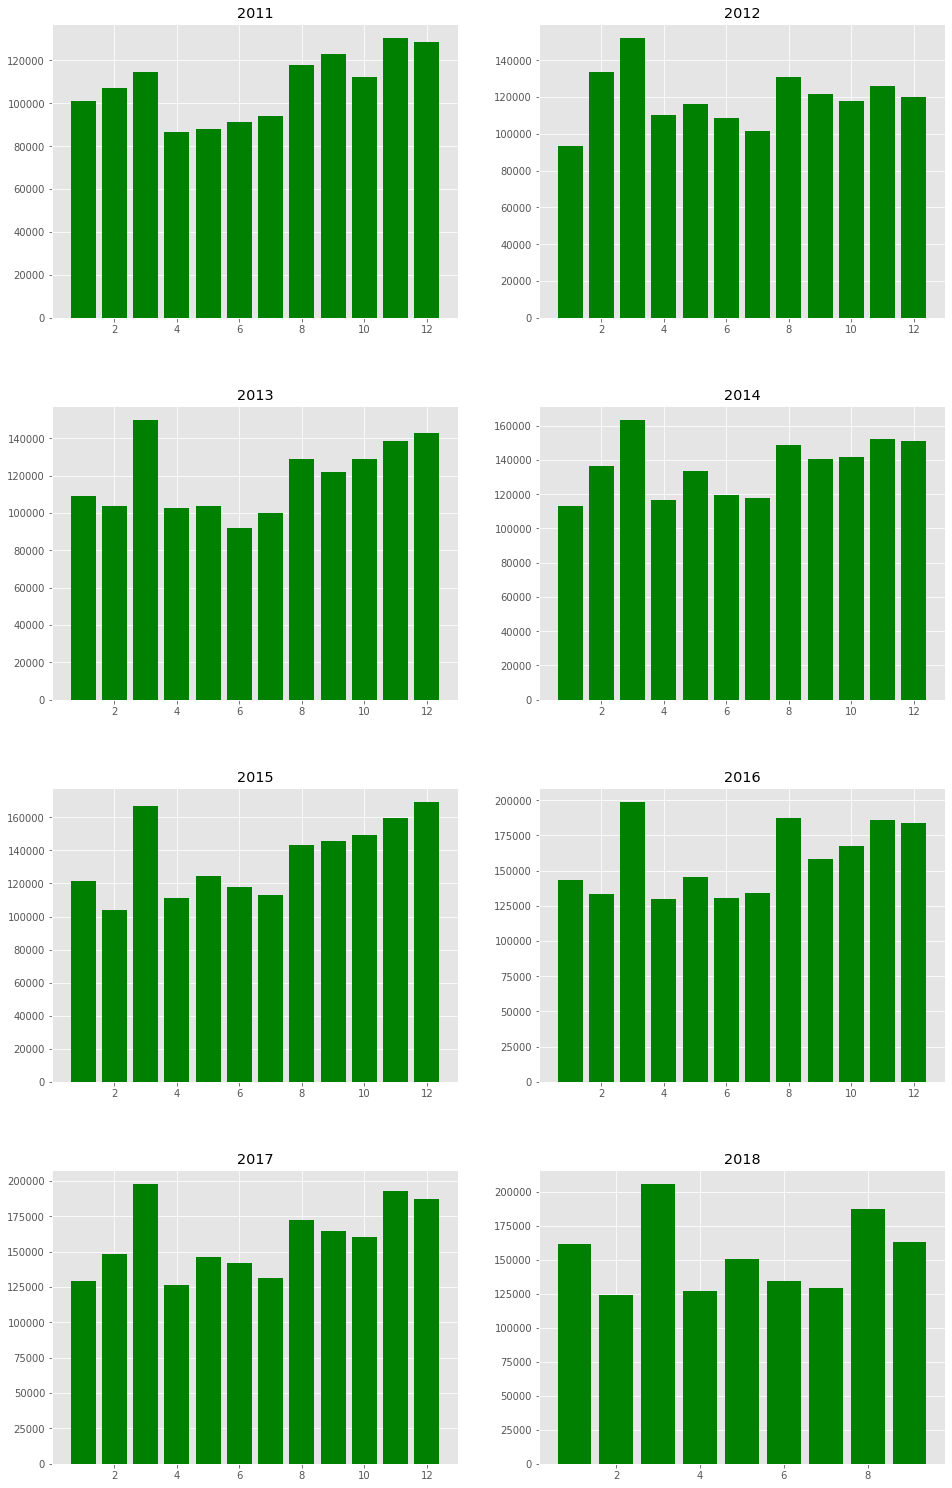

In [37]:
plt.figure(figsize=(16,25))
Y=['2011','2012','2013','2014','2015','2016','2017','2018']

for i in range(8):
    df_M = df_month_new[df_month_new['year']==2011+i]
    df_M = df_M[df_month_new['Residence']=='Japan'].groupby(df_month_new['month']).sum()
    df_M = df_M.iloc[:,0]
    plt.grid(True)
    plt.subplots_adjust(left=0.125, 
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.3)
    plt.subplot(421+i)
    plt.title(Y[i])
    plt.bar(df_M.index,df_M.values,color='g')
    

### 香港每年旅遊情況

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


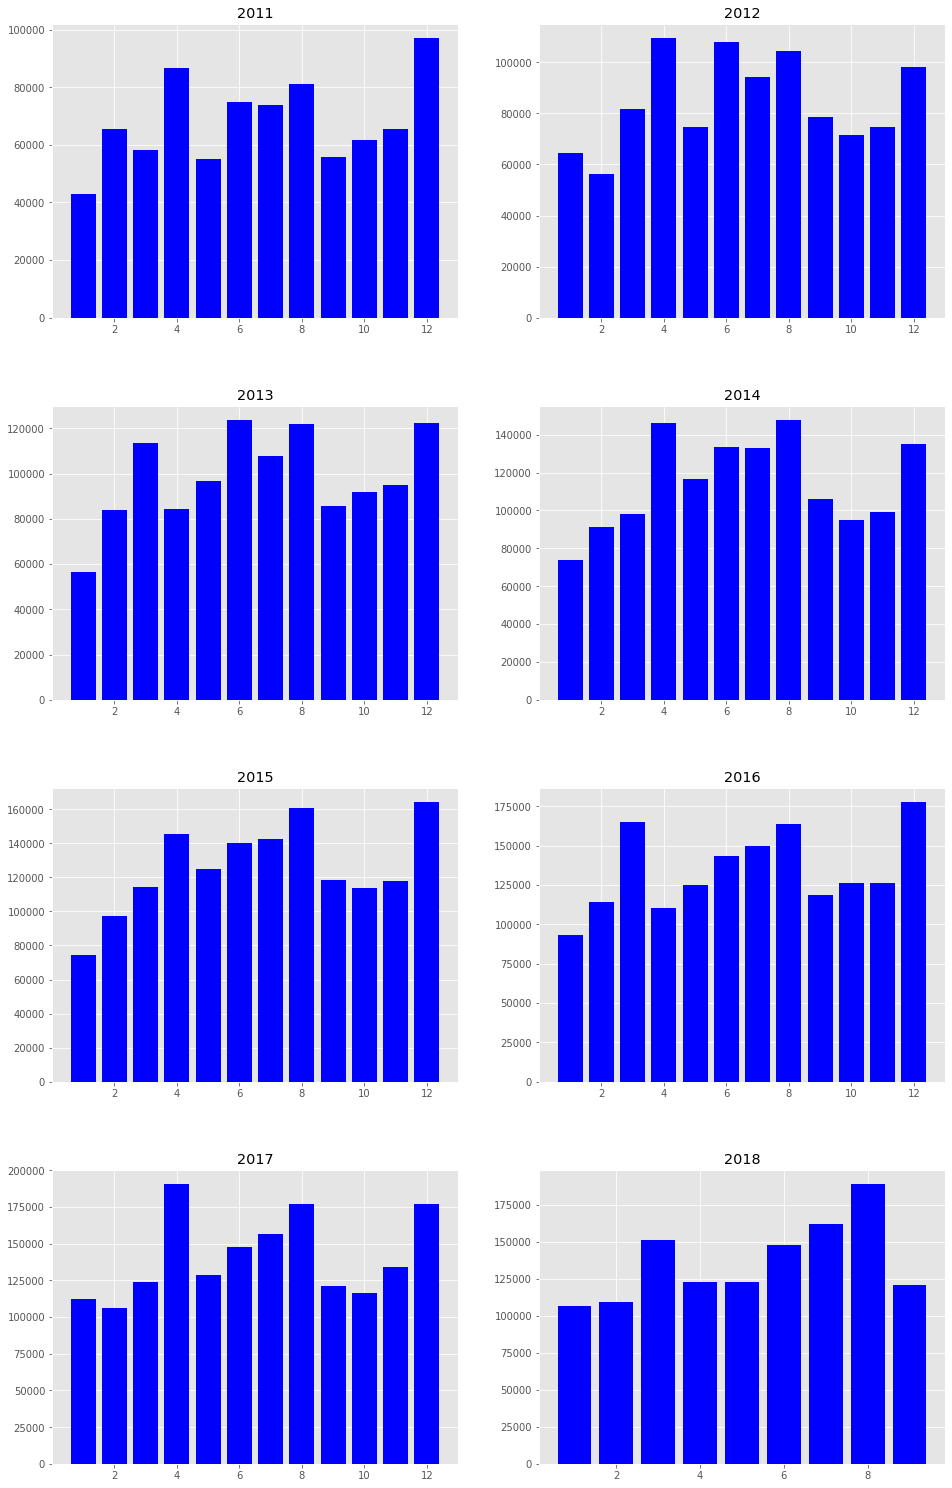

In [38]:
plt.figure(figsize=(16,25))
Y=['2011','2012','2013','2014','2015','2016','2017','2018']

for i in range(8):
    df_M = df_month_new[df_month_new['year']==2011+i]
    df_M = df_M[df_month_new['Residence']=='HongKong'].groupby(df_month_new['month']).sum()
    df_M = df_M.iloc[:,0]
    plt.grid(True)
    plt.subplots_adjust(left=0.125, 
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.3)
    plt.subplot(421+i)
    plt.title(Y[i])
    plt.bar(df_M.index,df_M.values,color='bb')

### 韓國每年旅遊情況

#### 可以看到人數從 2013 年底開始上升

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


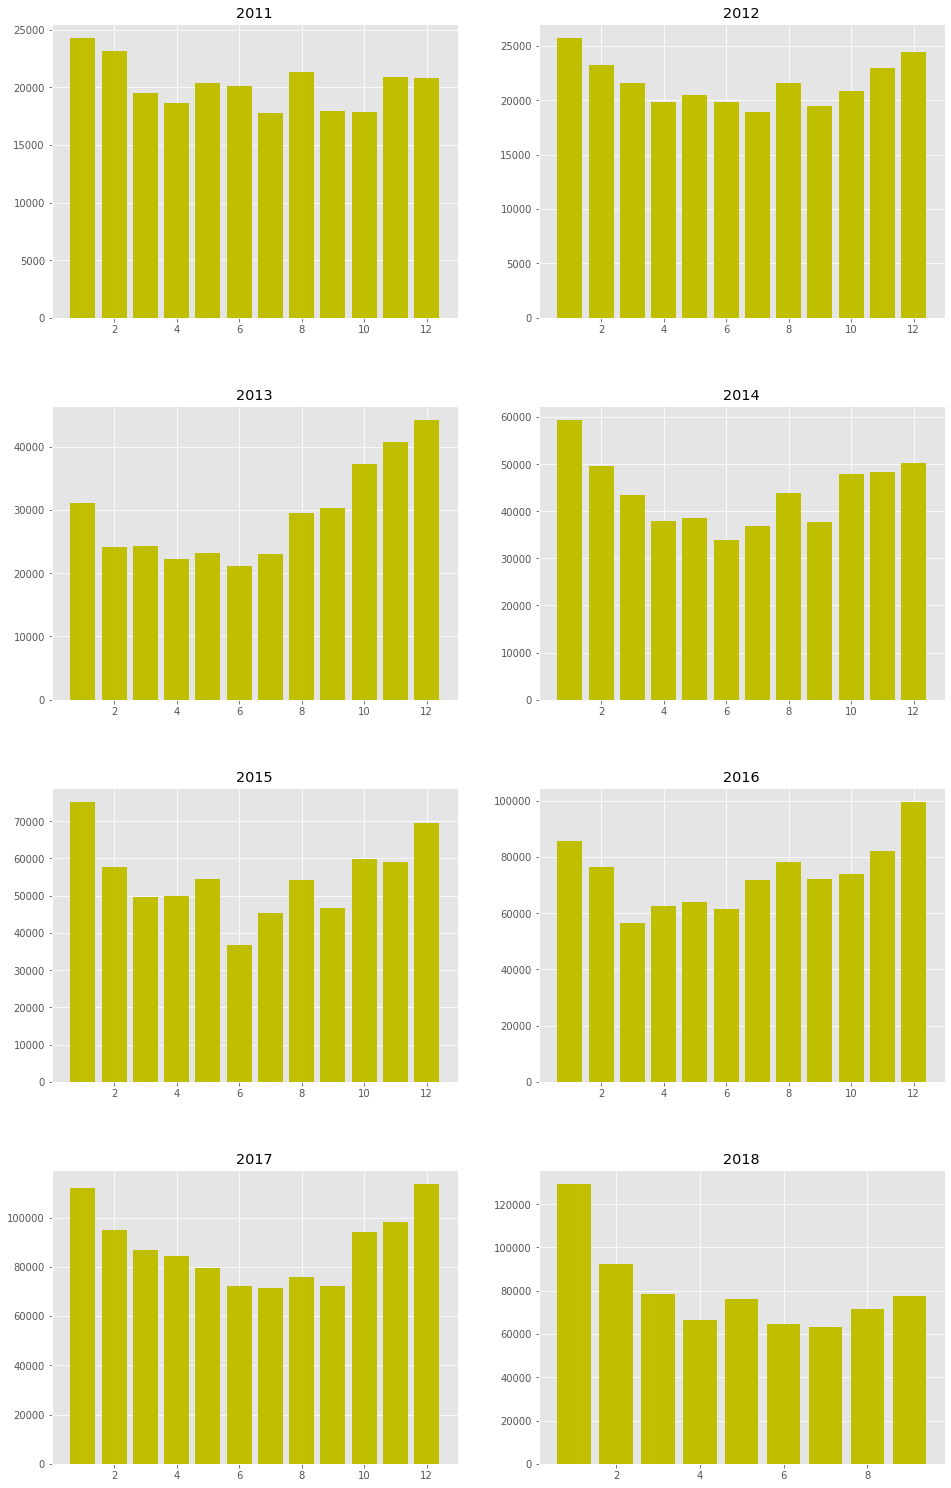

In [39]:
plt.figure(figsize=(16,25))
Y=['2011','2012','2013','2014','2015','2016','2017','2018']

for i in range(8):
    df_M = df_month_new[df_month_new['year']==2011+i]
    df_M = df_M[df_month_new['Residence']=='Korea'].groupby(df_month_new['month']).sum()
    df_M = df_M.iloc[:,0]
    plt.grid(True)
    plt.subplots_adjust(left=0.125, 
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.3)
    plt.subplot(421+i)
    plt.title(Y[i])
    plt.bar(df_M.index,df_M.values,color='y')

### 美國的情況

#### 6月是暑假，12 月是聖誕節 ( 美國的春節 )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


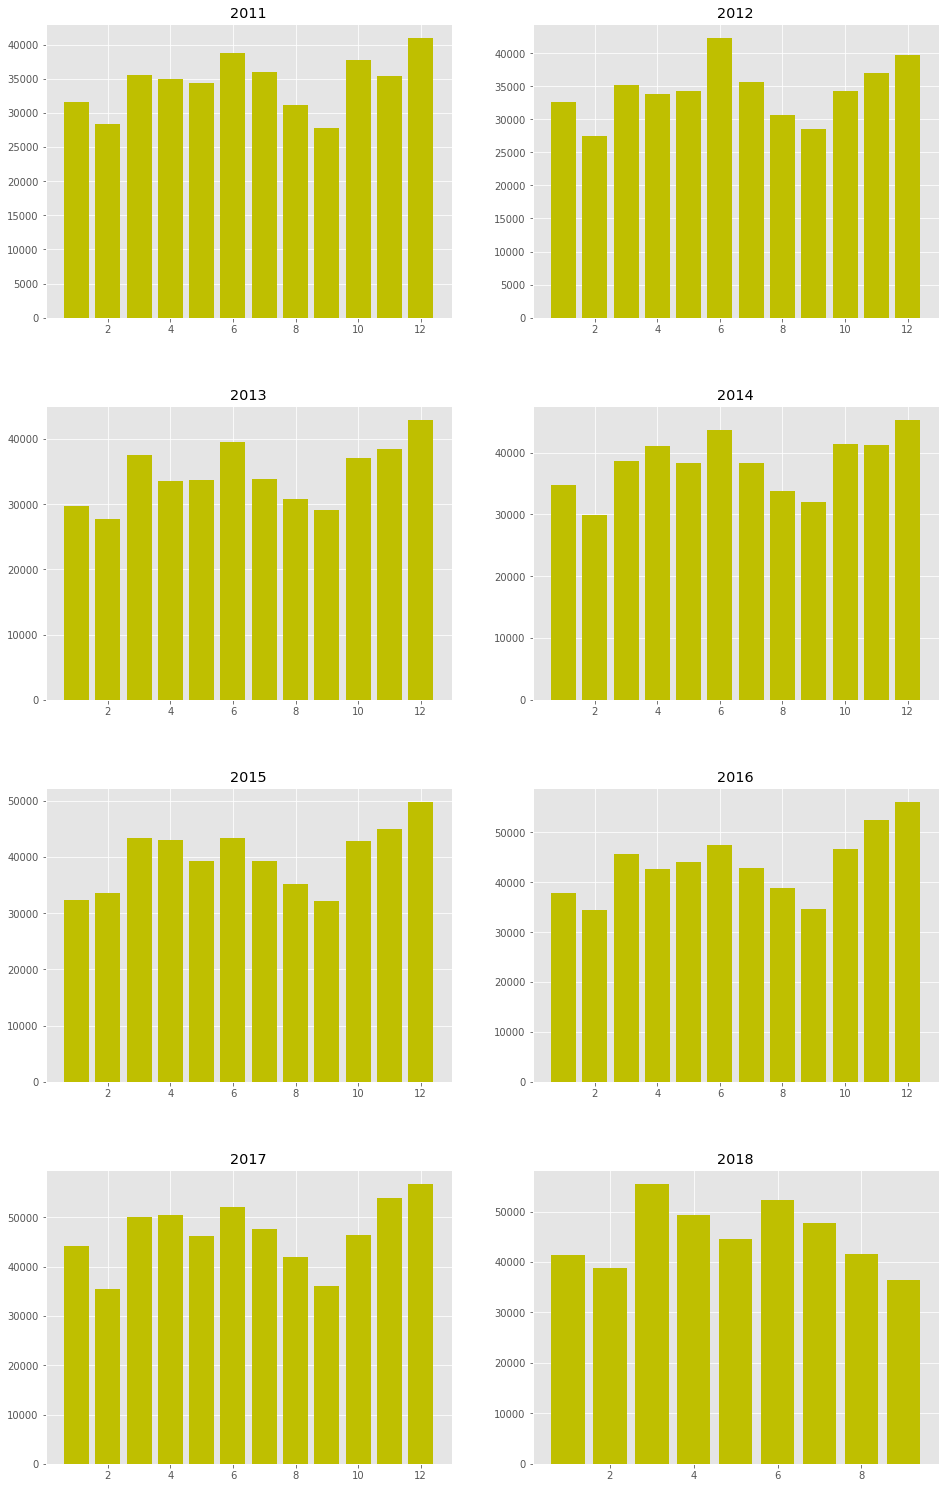

In [40]:
plt.figure(figsize=(16,25))
Y=['2011','2012','2013','2014','2015','2016','2017','2018']

for i in range(8):
    df_M = df_month_new[df_month_new['year']==2011+i]
    df_M = df_M[df_month_new['Residence']=='USA'].groupby(df_month_new['month']).sum()
    df_M = df_M.iloc[:,0]
    plt.grid(True)
    plt.subplots_adjust(left=0.125, 
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.3)
    plt.subplot(421+i)
    plt.title(Y[i])
    plt.bar(df_M.index,df_M.values,color='y')